# Background

In a highly competitive retail market, effective campaign strategies are essential for driving customer engagement, increasing sales, and enhancing brand loyalty. With the increasing diversity of shopping platforms and customer preferences, it is crucial to understand which channels and products generate the most engagement. This analysis aims to optimize marketing campaigns by examining customer behavior across different platforms and demographics to identify areas for improvement.

# Problem Statement :

Despite previous campaign efforts, engagement and acceptance rates vary significantly across customer segments and platforms. Key challenges include understanding which campaigns have the highest impact, identifying the most effective shopping platform, and determining how demographic factors like income and marital status influence campaign responses. Addressing these gaps can improve targeting and increase overall campaign effectiveness.

# Analysis Objectives:

1. Identify which campaign strategies have been most effective to replicate successful tactics.
2. Determine the most popular shopping platform to focus campaign efforts accordingly.
3. Analyze spending patterns by product category to prioritize promotions on high-demand items.
4. Understand customer demographics, such as income levels and marital status, to create more targeted and effective campaigns.

# Supermarket Customers Data Dictionary


 People
 - ID:Customer's unique identifier
 - Year_Birth: Customer's birth year
 - Education: Customer's education level
 - Marital_Status: Customer's marital status
 - Income: Customer's yearly household income
 - Kidhome: Number of children in customer's household
 - Teenhome: Number of teenagers in customer's household
 - Dt_Customer: Date of customer's enrollment with the company
 - Recency: Number of days since customer's last purchase
 - Complain: 1 if the customer complained in the last 2 years, 0 otherwise

 Products
 - MntWines: Amount spent on wine in last 2 years
 - MntFruits: Amount spent on fruits in last 2 years
 - MntMeatProducts: Amount spent on meat in last 2 years
 - MntFishProducts: Amount spent on fish in last 2 years
 - MntSweetProducts: Amount spent on sweets in last 2 years
 - MntGoldProds: Amount spent on gold in last 2 years

 Promotion
 - NumDealsPurchases: Number of purchases made with a discount
 - AcceptedCmp1: 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
 - AcceptedCmp2: 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
 - AcceptedCmp3: 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
 - AcceptedCmp4: 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
 - AcceptedCmp5: 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
 - Response: 1 if the customer accepted the offer in the last campaign, 0 otherwise
 
 Place
 - NumWebPurchases: Number of purchases made through the company’s website
 - NumCatalogPurchases: Number of purchases made using a catalog
 - NumStorePurchases: Number of purchases made directly in stores
 - NumWebVisitsMonth: Number of visits to the company’s website in the last mont

 Z-score
 - Z_CostContact = menunjukkan biaya atau pengeluaran dalam bentuk Z-score, mengindikasikan seberapa besar pengeluaran dibandingkan dengan rata-rata biaya
 - Z_Revenue = menunjukkan pendapatan pelanggan dalam bentuk Z-score, mengindikasikan seberapa besar pendapatan tersebut dibandingkan dengan rata-rata.

 additional :
 - age colomn
 - household
 - rfm score

IMPORT LIBRARY

In [88]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from scipy import stats
import statsmodels.api as sm
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')


LOAD AND READ DATA

In [89]:
df = pd.read_csv('Supermarket Customers.csv')
df.head()

,ID\tYear_Birth\tEducation\tMarital_Status\tIncome\tKidhome\tTeenhome\tDt_Customer\tRecency\tMntWines\tMntFruits\tMntMeatProducts\tMntFishProducts\tMntSweetProducts\tMntGoldProds\tNumDealsPurchases\tNumWebPurchases\tNumCatalogPurchases\tNumStorePurchases\tNumWebVisitsMonth\tAcceptedCmp3\tAcceptedCmp4\tAcceptedCmp5\tAcceptedCmp1\tAcceptedCmp2\tComplain\tZ_CostContact\tZ_Revenue\tResponse
0,5524\t1957\tGraduation\tSingle\t58138\t0\t0\t0...
1,2174\t1954\tGraduation\tSingle\t46344\t1\t1\t0...
2,4141\t1965\tGraduation\tTogether\t71613\t0\t0\...
3,6182\t1984\tGraduation\tTogether\t26646\t1\t0\...
4,5324\t1981\tPhD\tMarried\t58293\t1\t0\t19-01-2...


# Cleaning the data

In [90]:
df_cleaned = pd.read_csv('Supermarket Customers.csv', delimiter='\t')
df_cleaned.head(10)


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0
5,7446,1967,Master,Together,62513.0,0,1,09-09-2013,16,520,...,6,0,0,0,0,0,0,3,11,0
6,965,1971,Graduation,Divorced,55635.0,0,1,13-11-2012,34,235,...,6,0,0,0,0,0,0,3,11,0
7,6177,1985,PhD,Married,33454.0,1,0,08-05-2013,32,76,...,8,0,0,0,0,0,0,3,11,0
8,4855,1974,PhD,Together,30351.0,1,0,06-06-2013,19,14,...,9,0,0,0,0,0,0,3,11,1
9,5899,1950,PhD,Together,5648.0,1,1,13-03-2014,68,28,...,20,1,0,0,0,0,0,3,11,0


In [91]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

from above we get incompatibility data type
- Dt_Customer should be DATE


In [92]:
df_cleaned['Dt_Customer'] = pd.to_datetime(df_cleaned['Dt_Customer'], format='%d-%m-%Y')
df_cleaned[['Dt_Customer']].head()

,Dt_Customer
0,2012-09-04
1,2014-03-08
2,2013-08-21
3,2014-02-10
4,2014-01-19


# Missing Value

In [93]:
# FIND MISSING VALUES IN DATASET

missing_values = df_cleaned.isnull().sum()
df_types = df_cleaned.dtypes

print(f'Showing the missing values and the data types of the columns: \n{missing_values}\n{df_types}')


Showing the missing values and the data types of the columns: 
ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64
ID                              int64
Year_Birth                      int64
Education                      object
Marital_Status                 object
Income            

In [94]:
# persentase missing value in each column 
df_cleaned.isna().sum()/df_cleaned.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

# DaViz Missing value in dataset df_cleaned

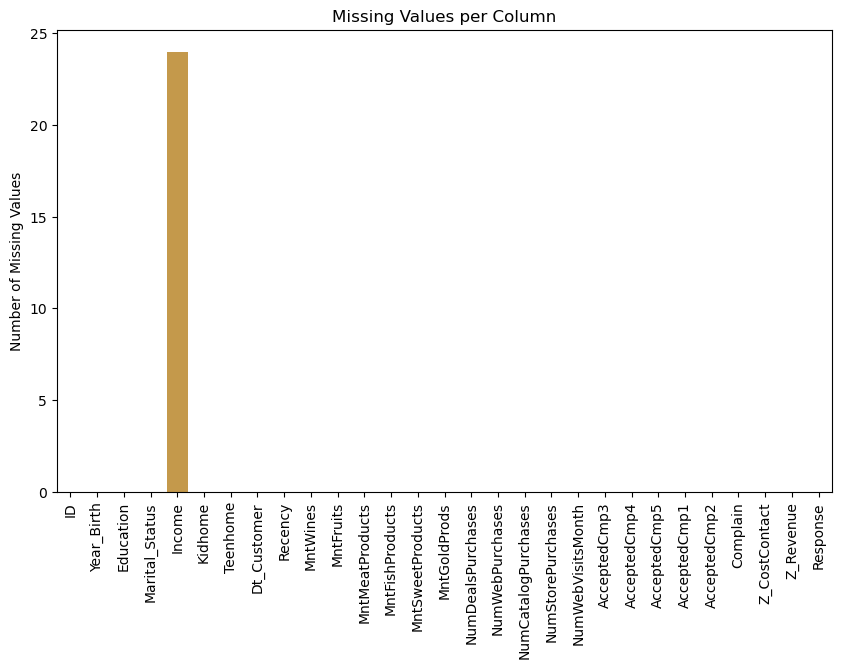

In [95]:
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xticks(rotation=90)
plt.title('Missing Values per Column')
plt.ylabel('Number of Missing Values')
plt.show()

column income had missing value = 24

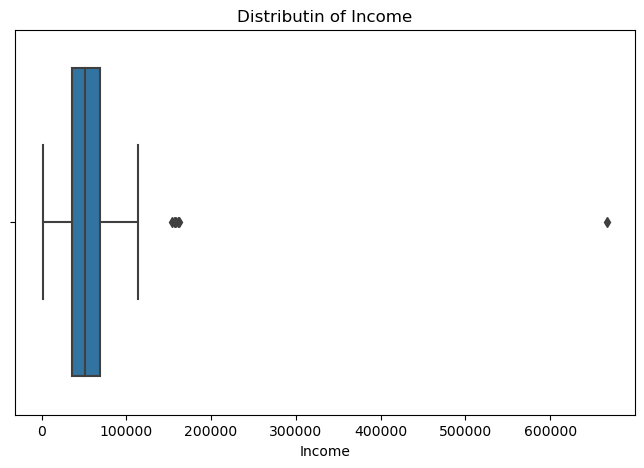

In [96]:
plt.figure(figsize=(8, 5))
sns.boxplot(x=df_cleaned['Income'])
plt.title('Distributin of Income')
plt.xlabel('Income')
plt.show()



In [97]:
# Skewness < 0: Negatively skewed (distribution skewed to the left).
# Example values: -0.5, -1, -2, etc.
# Skewness > 0: Positively skewed (distribution skewed to the right).
# Example values: 0.5, 1, 2, etc.
# Skewness ≈ 0: Symmetrical, approximately normal distribution.

df_cleaned['Income'].skew()

6.763487372811116

# Handle Missing Value in Income 

In [98]:
# Use median beacuse the data is skewed
df_cleaned['Income'].fillna(df_cleaned['Income'].median(), inplace=True)

In [99]:
# after handling missing values
df_cleaned[['Income']].isnull().sum()


Income    0
dtype: int64

In [100]:
df_cleaned.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

# Duplicates

In [101]:
df_cleaned.duplicated().sum() 

0

# Outliers

CHECK NUMERICAL AND CATEGORICAL DATA

In [102]:
# Categorical Columns
categorical_columns = df_cleaned.select_dtypes(include=['object']).columns
print("Categorical Columns:", categorical_columns)

# Numerical Columns
numeric_columns = df_cleaned.select_dtypes(include=['float64', 'int64']).columns
print("Numerical Columns:", numeric_columns)

Categorical Columns: Index(['Education', 'Marital_Status'], dtype='object')
Numerical Columns: Index(['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5',
       'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact',
       'Z_Revenue', 'Response'],
      dtype='object')


# Z_CostContact and Z_Revenue
Because there is a column with a Z-score calculation, and the value is same in all of row. I assume that the column possible anomalies and being uninformative. 

In [103]:
df_cleaned['Z_CostContact'].value_counts().reset_index()

,Z_CostContact,count
0,3,2240


In [104]:
df_cleaned['Z_Revenue'].value_counts().reset_index()

,Z_Revenue,count
0,11,2240


In [105]:
# Drop Z_CostContact and Z_Revenue
df_cleaned = df_cleaned.drop(columns=['Z_Revenue', 'Z_CostContact'])

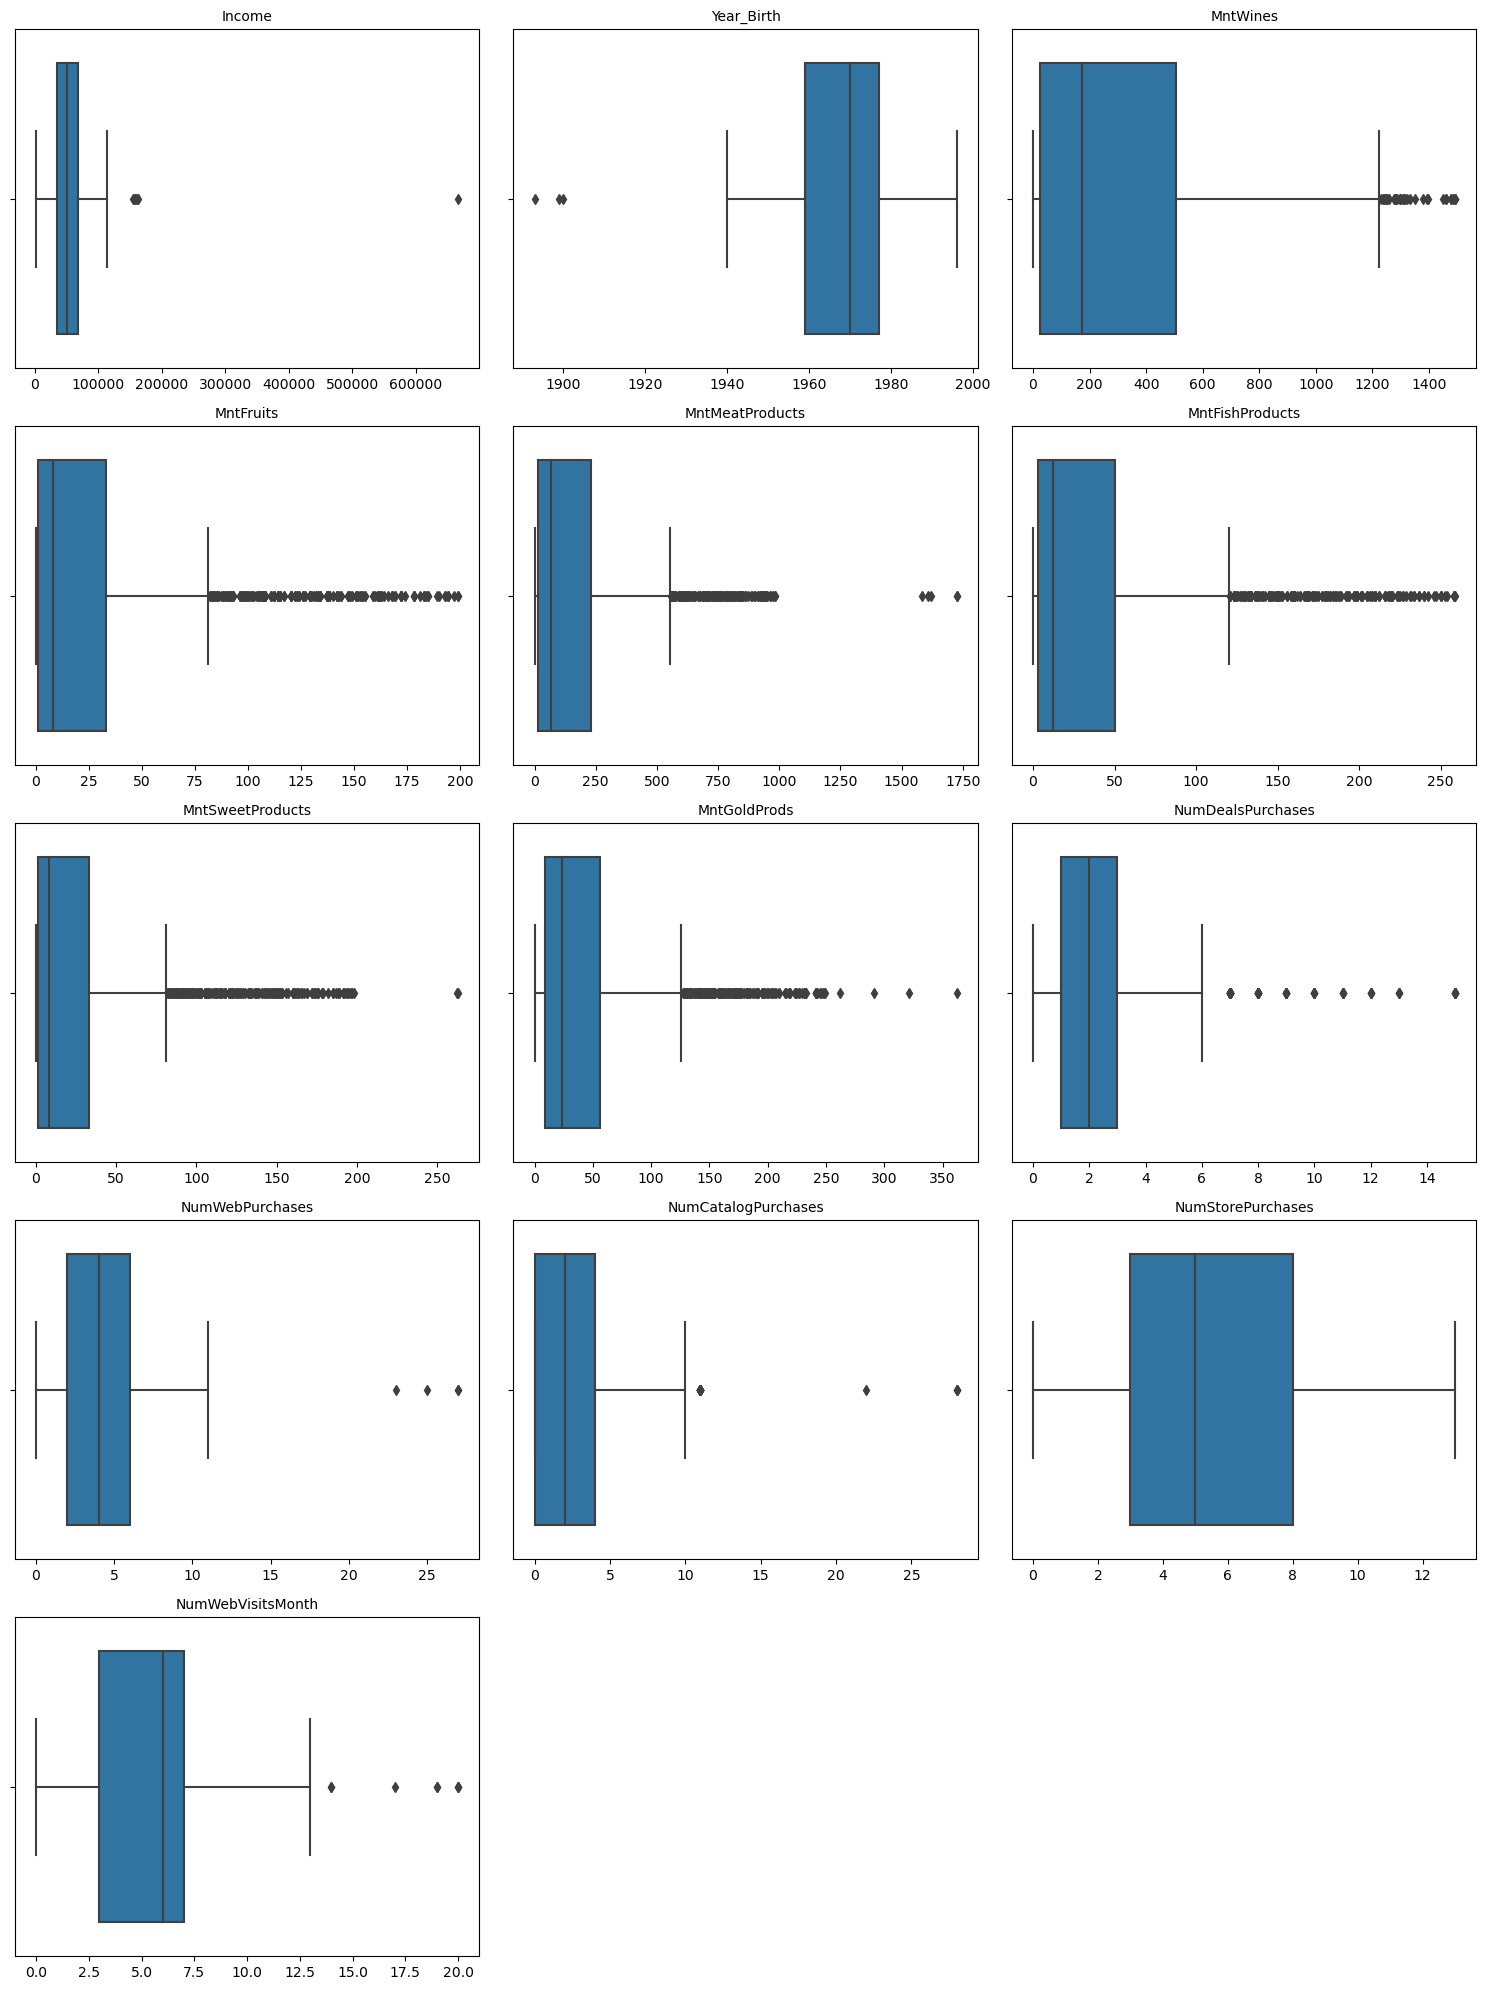

In [106]:
numeric_columns = ['Income', 'Year_Birth', 'MntWines', 'MntFruits', 'MntMeatProducts', 
                   'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
                   'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']


plt.figure(figsize=(15, 20))  
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(5, 3, i)  
    sns.boxplot(x=df_cleaned[col])
    plt.title(col, fontsize=10)
    plt.xlabel('')  

plt.tight_layout()
plt.show()


from the visulization, Income and yearbirth have extreme outliers. So, I'll handle it

In [107]:
def outlier_percentage(column):
    Q1 = df_cleaned[column].quantile(0.25)
    Q3 = df_cleaned[column].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df_cleaned[(df_cleaned[column] < (Q1 - 1.5 * IQR)) | (df_cleaned[column] > (Q3 + 1.5 * IQR))]
    return len(outliers) / len(df) * 100

for col in numeric_columns:
    print(f"{col}: {outlier_percentage(col):.2f}% outliers")


Income: 0.36% outliers
Year_Birth: 0.13% outliers
MntWines: 1.56% outliers
MntFruits: 10.13% outliers
MntMeatProducts: 7.81% outliers
MntFishProducts: 9.96% outliers
MntSweetProducts: 11.07% outliers
MntGoldProds: 9.24% outliers
NumDealsPurchases: 3.84% outliers
NumWebPurchases: 0.18% outliers
NumCatalogPurchases: 1.03% outliers
NumStorePurchases: 0.00% outliers
NumWebVisitsMonth: 0.36% outliers


- Income and Year_birth have small percentage so I'll drop it. 
- For product categories, outliers often reflect unique customer behavior and I'll use the column for RFM analysis so I prefer to kept the outliers
- For purchase platforms, outliers may represent specific shopping preferences

# Handle outliers in Income and Year_birth column

In [108]:
# Menentukan batas IQR untuk kolom Income
Q1_income = df_cleaned['Income'].quantile(0.25)
Q3_income = df_cleaned['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income
lower_bound_income = Q1_income - 1.5 * IQR_income
upper_bound_income = Q3_income + 1.5 * IQR_income

# Menentukan batas IQR untuk kolom Year_Birth
Q1_birth = df_cleaned['Year_Birth'].quantile(0.25)
Q3_birth = df_cleaned['Year_Birth'].quantile(0.75)
IQR_birth = Q3_birth - Q1_birth
lower_bound_birth = Q1_birth - 1.5 * IQR_birth
upper_bound_birth = Q3_birth + 1.5 * IQR_birth

print(f"Lower bound Income: {lower_bound_income}")
print(f"Upper bound Income: {upper_bound_income}")
print(f"Lower bound Year_Birth: {lower_bound_birth}")
print(f"Upper bound Year_Birth: {upper_bound_birth}")


Lower bound Income: -13587.75
Upper bound Income: 117416.25
Lower bound Year_Birth: 1932.0
Upper bound Year_Birth: 2004.0


In [109]:
# Drop outliers in Income
df_cleaned = df_cleaned[(df_cleaned['Income'] >= lower_bound_income) & (df_cleaned['Income'] <= upper_bound_income)]

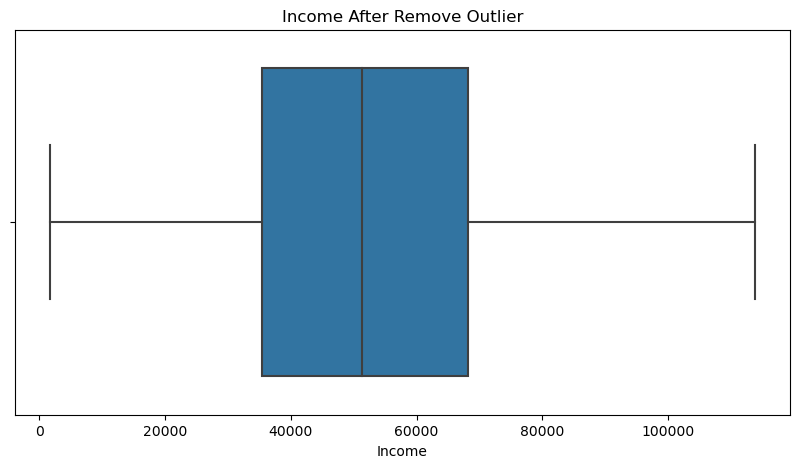

In [110]:
plt.figure(figsize=(10, 5)) 
sns.boxplot(x=df_cleaned['Income'])
plt.title('Income After Remove Outlier')
plt.show()

In [111]:
# Drop outliers in Year_Birth
df_cleaned = df_cleaned[(df_cleaned['Year_Birth'] >= lower_bound_birth) & (df_cleaned['Year_Birth'] <= upper_bound_birth)]

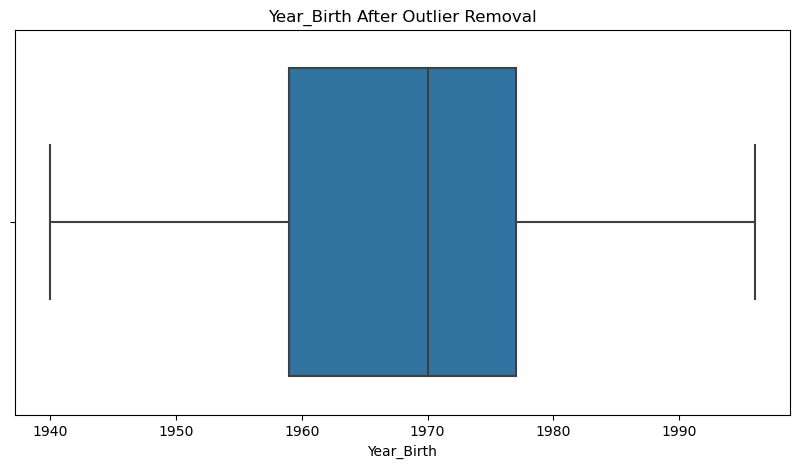

In [112]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df_cleaned['Year_Birth'])
plt.title('Year_Birth After Outlier Removal')
plt.show()

# Add column

In [113]:
# Household_Size
df_cleaned['Household_Size'] = df_cleaned['Kidhome'] + df_cleaned['Teenhome'] + 1

#Total_Spending 
df_cleaned['Total_Spending'] = df_cleaned[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)


In [147]:
# 2016 because newest year of the customer registration is 2014. So I assume that the customer's age is 2014 + 2 years
df_cleaned['Age'] = 2016 - df_cleaned['Year_Birth']

# categorize age
def categorize_age(age):
    if age < 25:
        return 'Teenager'
    elif 25 <= age < 45:
        return 'Adult'
    elif 45 <= age < 65:
        return 'Middle-Aged'
    else:
        return 'Senior'

# create age group column
df_cleaned['Age_Group'] = df_cleaned['Age'].apply(categorize_age)


In [148]:
# Income Grouping
df_cleaned['Income_Group'] = pd.qcut(df_cleaned['Income'], 3, labels=['Low', 'Medium', 'High'])


In [150]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2229 entries, 0 to 2239
Data columns (total 46 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   ID                        2229 non-null   int64         
 1   Year_Birth                2229 non-null   int64         
 2   Education                 2229 non-null   object        
 3   Marital_Status            2229 non-null   object        
 4   Income                    2229 non-null   float64       
 5   Kidhome                   2229 non-null   int64         
 6   Teenhome                  2229 non-null   int64         
 7   Dt_Customer               2229 non-null   datetime64[ns]
 8   Recency                   2229 non-null   int64         
 9   MntWines                  2229 non-null   int64         
 10  MntFruits                 2229 non-null   int64         
 11  MntMeatProducts           2229 non-null   int64         
 12  MntFishProducts          

RFM (Recency, Frequency, Monatry)

In [114]:
# Count of Frequency in each Purchase Platform
df_cleaned['Frequency'] = df_cleaned['NumWebPurchases'] + df_cleaned['NumCatalogPurchases'] + df_cleaned['NumStorePurchases']

# Sum the spendings in each category for Monetary
df_cleaned['Monetary'] = df_cleaned[['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

In [115]:
# Scoring R, F, and M

df_cleaned['R_Score'] = pd.qcut(df_cleaned['Recency'], 5, labels=[5, 4, 3, 2, 1])  # 5 new customer, 1 loyal customer
df_cleaned['F_Score'] = pd.qcut(df_cleaned['Frequency'], 5, labels=[1, 2, 3, 4, 5]) # 5 often purchased, 1 rarely purchased
df_cleaned['M_Score'] = pd.qcut(df_cleaned['Monetary'], 5, labels=[1, 2, 3, 4, 5]) # 5 high spenders, 1 low spenders


In [116]:
# convert to string for merge the score
df_cleaned['RFM_Segment'] = df_cleaned['R_Score'].astype(str) + df_cleaned['F_Score'].astype(str) + df_cleaned['M_Score'].astype(str)

# convert to integer for total score
df_cleaned['RFM_Score'] = df_cleaned['R_Score'].astype(int) + df_cleaned['F_Score'].astype(int) + df_cleaned['M_Score'].astype(int)


Mengelompokkan Berdasarkan RFM Segmen

- Best Customers: R=5, F=5, M=5.
- Loyal Customers: R=3, F=4, M=4.
- At Risk: R =2, M = >3
- Lost Customers: else

RFM_Category_Detailed
Lost Customers     1180
Loyal Customers     554
Best Customers      290
At Risk             205
Name: count, dtype: int64


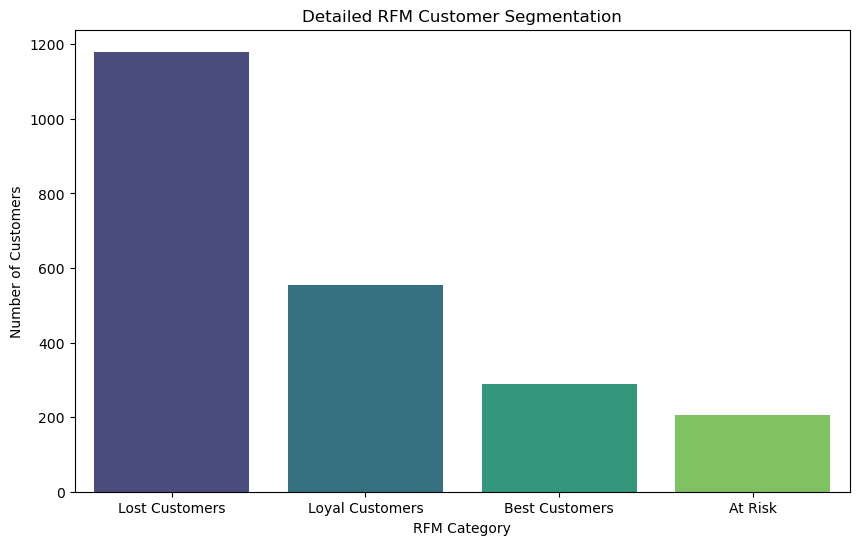

In [117]:
# Categorize RFM Score
def categorize_rfm(row):
    if row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return 'Best Customers'
    elif row['F_Score'] >= 4 and row['M_Score'] >= 3:
        return 'Loyal Customers'
    elif row['R_Score'] <= 2 and row['M_Score'] >= 3:
        return 'At Risk'
    else:
        return 'Lost Customers'

# Detail score each category in RFM
df_cleaned['RFM_Category_Detailed'] = df_cleaned.apply(categorize_rfm, axis=1)
rfm_detailed_counts = df_cleaned['RFM_Category_Detailed'].value_counts()
print(rfm_detailed_counts)

# viz
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='RFM_Category_Detailed', order=rfm_detailed_counts.index, palette='viridis')
plt.title('Detailed RFM Customer Segmentation')
plt.xlabel('RFM Category')
plt.ylabel('Number of Customers')
plt.show()


# Replace value in column who had inconsistencies value

1. Marital_Status column

In [118]:
marital_df = df_cleaned['Marital_Status'].value_counts().reset_index()


marital_df.columns = ['Marital_Status', 'Count']
print(marital_df)

  Marital_Status  Count
0        Married    861
1       Together    575
2         Single    479
3       Divorced    230
4          Widow     77
5          Alone      3
6         Absurd      2
7           YOLO      2


In [141]:
# Replace values
df_cleaned['Marital_Status_Grouped'] = df_cleaned['Marital_Status'].replace({
    'Single': 'Single',
    'Alone': 'Single',
    'Married': 'In a Relationship',
    'Together': 'In a Relationship',
    'Divorced': 'Single',
    'Widow': 'Single',
    'Absurd': 'Other',
    'YOLO': 'Other'
})

print(f'Unique values in Marital_Status_Grouped: {df_cleaned["Marital_Status_Grouped"].unique()}')

Unique values in Marital_Status_Grouped: ['Single' 'In a Relationship' 'Other']


2. Education column

In [120]:

Education_df = df_cleaned['Education'].value_counts().reset_index()


Education_df.columns = ['Education', 'Count']
print(Education_df)

    Education  Count
0  Graduation   1124
1         PhD    481
2      Master    369
3    2n Cycle    201
4       Basic     54


In [140]:
df_cleaned['Education_Grouped'] = df_cleaned['Education'].replace({
    'PhD': 'Postgraduate',
    'Master': 'Postgraduate',
    '2n Cycle': 'Graduate',
    'Graduation': 'Graduate',
    'Basic': 'Undergraduate'
})


print(f'Unique values in Education_Grouped: {df_cleaned["Education_Grouped"].unique()}')

Unique values in Education_Grouped: ['Graduate' 'Postgraduate' 'Undergraduate']


# Analisis

# Demografis

1. Customer Age Range Analysis

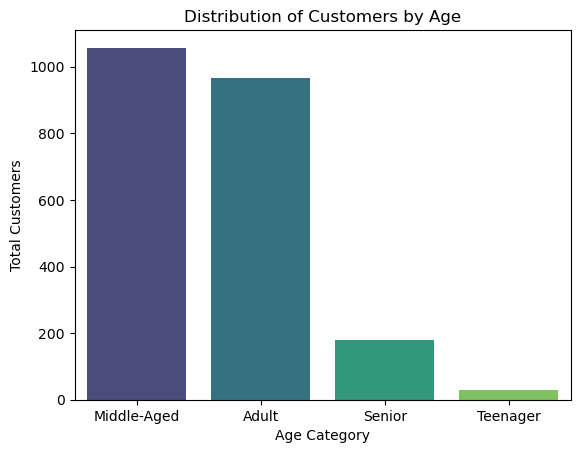

In [ ]:
sns.countplot(data=df_cleaned, x='Age_Group', palette='viridis')
plt.title('Distribution of Customers by Age') 
plt.xlabel('Age Category')
plt.ylabel('Total Customers')
plt.show()

2. Education Level by Total Customer

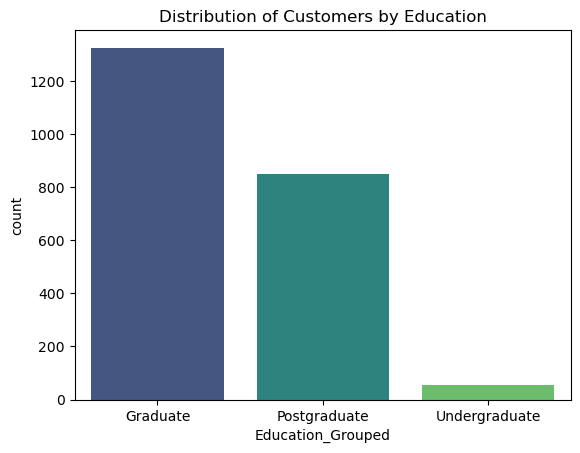

In [167]:
sns.countplot(data=df_cleaned, x='Education_Grouped', palette='viridis')
plt.title('Distribution of Customers by Education')
plt.show()

3. Marital Status by Total Customer

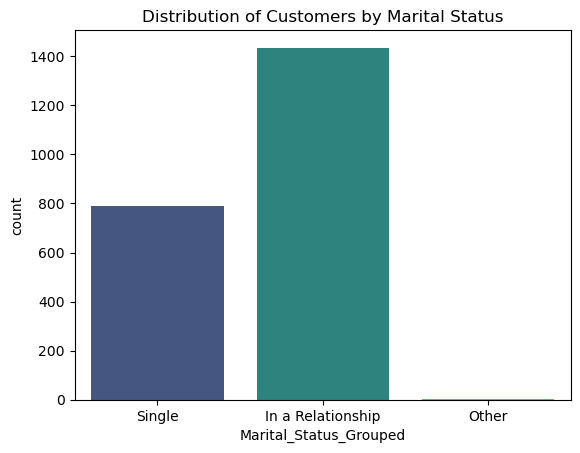

In [166]:
sns.countplot(data=df_cleaned, x='Marital_Status_Grouped', palette='viridis')
plt.title('Distribution of Customers by Marital Status')
plt.show()

4. Income group dengan education group

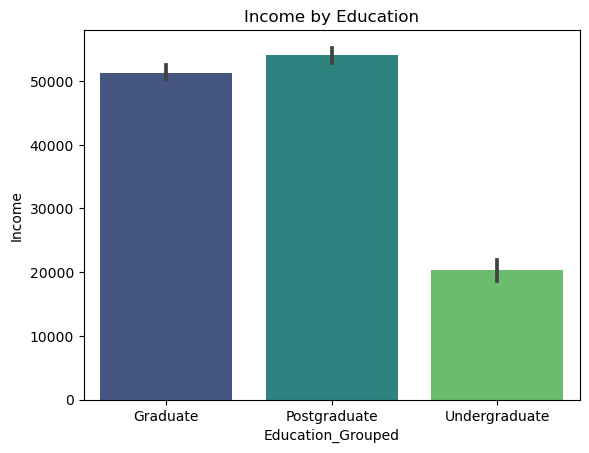

In [ ]:
sns.barplot(data=df_cleaned, x='Education_Grouped', y='Income', palette='viridis')
plt.title('Income by Education')
plt.show()

4. Avergae Spending

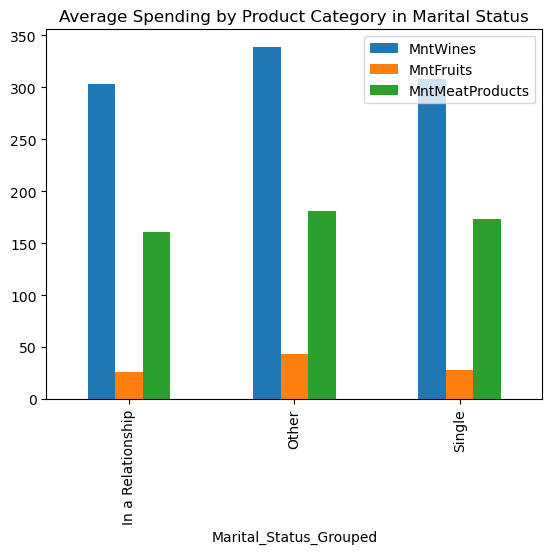

In [219]:
# Average Spending by Product Category in Marital Status
avg_spending_marital = df_cleaned.groupby('Marital_Status_Grouped')[['MntWines', 'MntFruits', 'MntMeatProducts']].mean()
avg_spending_marital.plot(kind='bar')
plt.title('Average Spending by Product Category in Marital Status')
plt.show()


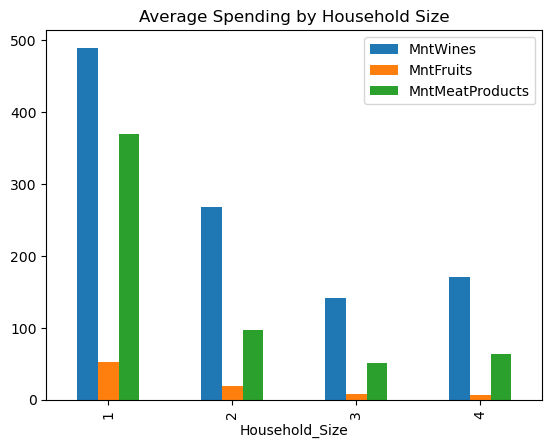

In [ ]:
# Average Spending by Household_Size
avg_spending_household = df_cleaned.groupby('Household_Size')[['MntWines', 'MntFruits', 'MntMeatProducts']].mean()
avg_spending_household.plot(kind='bar')
plt.title('Average Spending by Household Size')
plt.show()

# Purchase Analysis by Product

1. Total Spending per Product Category

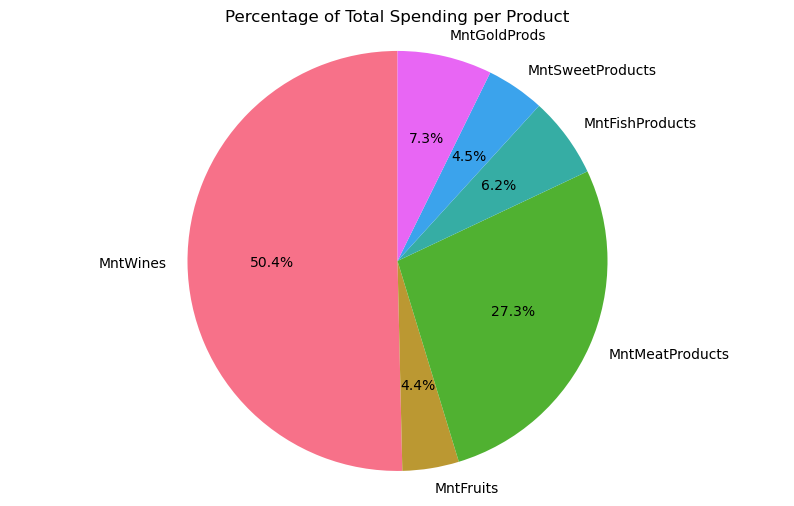

In [189]:

product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spending = df_cleaned[product_columns].sum()

# define colors
colors = sns.color_palette("husl", len(total_spending))

plt.figure(figsize=(10, 6))
total_spending.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=colors)
plt.title('Percentage of Total Spending per Product')
plt.ylabel('')  
plt.axis('equal')  
plt.show()


2. Most Purchased Product

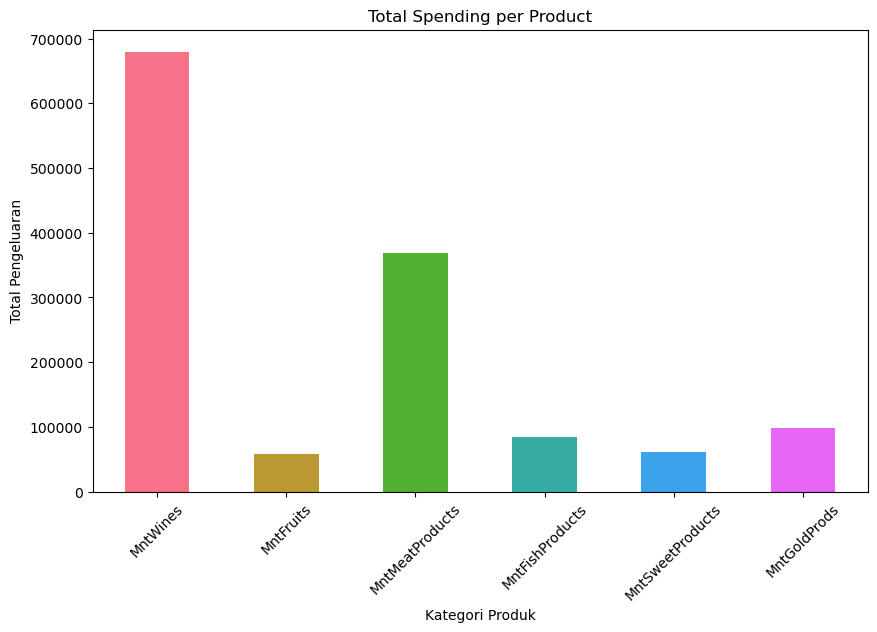

In [ ]:

product_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
total_spending = df_cleaned[product_columns].sum()

# define colors
colors = sns.color_palette("husl", len(total_spending))

# tidak dengan pie chart
plt.figure(figsize=(10, 6))
total_spending.plot(kind='bar', color=colors)
plt.title('Total Spending per Product')
plt.xlabel('Kategori Produk')
plt.ylabel('Total Pengeluaran')
plt.xticks(rotation=45)
plt.show()

# RFM Analysis

1. Segmentation customers to understand purchasing behavior based on last time they shopped (Recency), frequency, and value of shopping (Monetery)

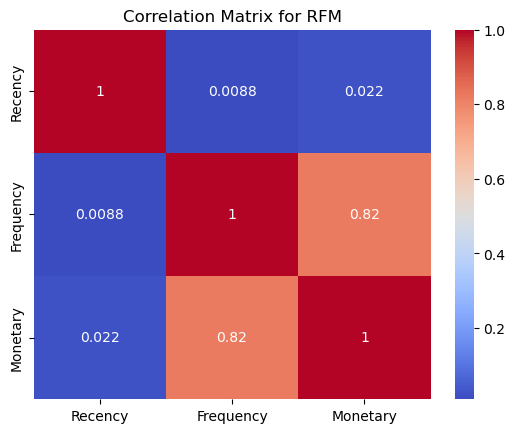

In [200]:
# Heatmap correlation
sns.heatmap(df_cleaned[['Recency', 'Frequency', 'Monetary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix for RFM')
plt.show()

more positive more have correlation

Conclusion from This Heatmap:
- Frequency and Monetary have a strong and positive relationship.
- Recency does not have a significant relationship with Frequency or Monetary.

2. RFM segmentation based on Category

RFM_Category_Detailed
Lost Customers     1180
Loyal Customers     554
Best Customers      290
At Risk             205
Name: count, dtype: int64


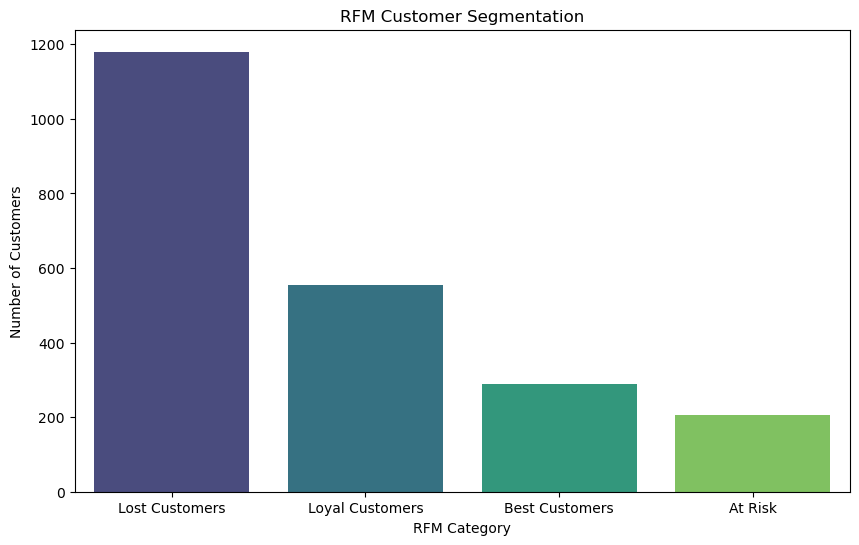

In [202]:
# Categorize RFM Score
def categorize_rfm(row):
    if row['R_Score'] >= 4 and row['F_Score'] >= 4 and row['M_Score'] >= 4:
        return 'Best Customers'
    elif row['F_Score'] >= 4 and row['M_Score'] >= 3:
        return 'Loyal Customers'
    elif row['R_Score'] <= 2 and row['M_Score'] >= 3:
        return 'At Risk'
    else:
        return 'Lost Customers'

# Detail score each category in RFM
df_cleaned['RFM_Category_Detailed'] = df_cleaned.apply(categorize_rfm, axis=1)
rfm_detailed_counts = df_cleaned['RFM_Category_Detailed'].value_counts()
print(rfm_detailed_counts)

# viz
plt.figure(figsize=(10, 6))
sns.countplot(data=df_cleaned, x='RFM_Category_Detailed', order=rfm_detailed_counts.index, palette='viridis')
plt.title('RFM Customer Segmentation')
plt.xlabel('RFM Category')
plt.ylabel('Number of Customers')
plt.show()


# Platform

1. Average Purchased by Platform or Favorite platform

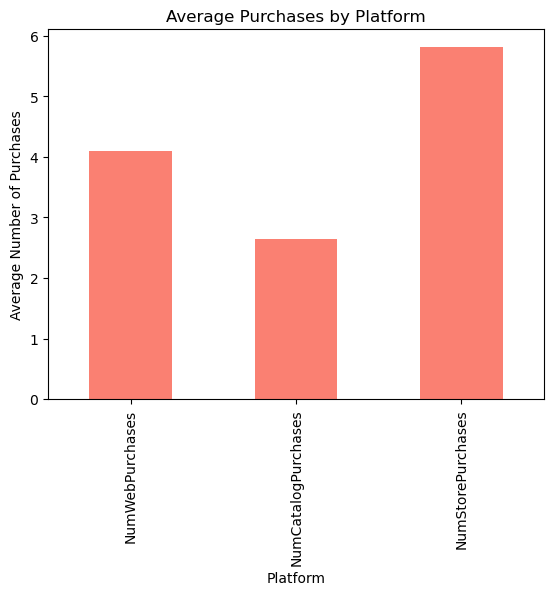

In [220]:

platform_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
platform_counts = df_cleaned[platform_columns].mean()

platform_counts.plot(kind='bar', color='salmon')
plt.title('Average Purchases by Platform')
plt.xlabel('Platform')
plt.ylabel('Average Number of Purchases')
plt.show()

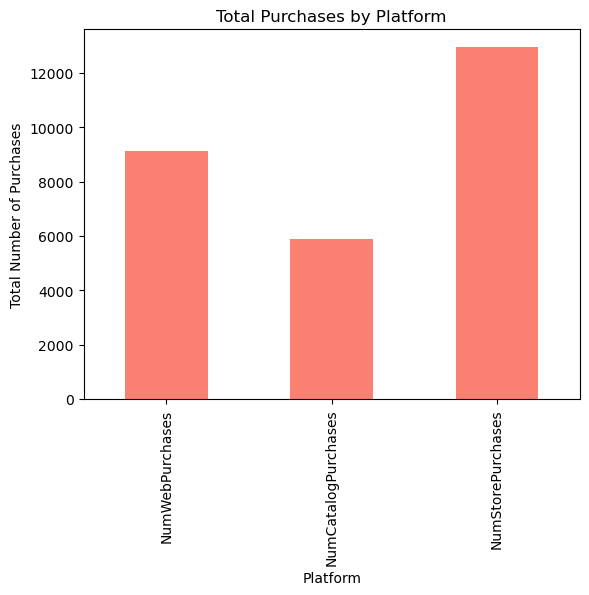

In [226]:

platform_columns = ['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']
platform_counts = df_cleaned[platform_columns].sum()

platform_counts.plot(kind='bar', color='salmon')
plt.title('Total Purchases by Platform')
plt.xlabel('Platform')
plt.ylabel('Total Number of Purchases')
plt.show()

# Income Analysis

1. Income Distibution of Customer


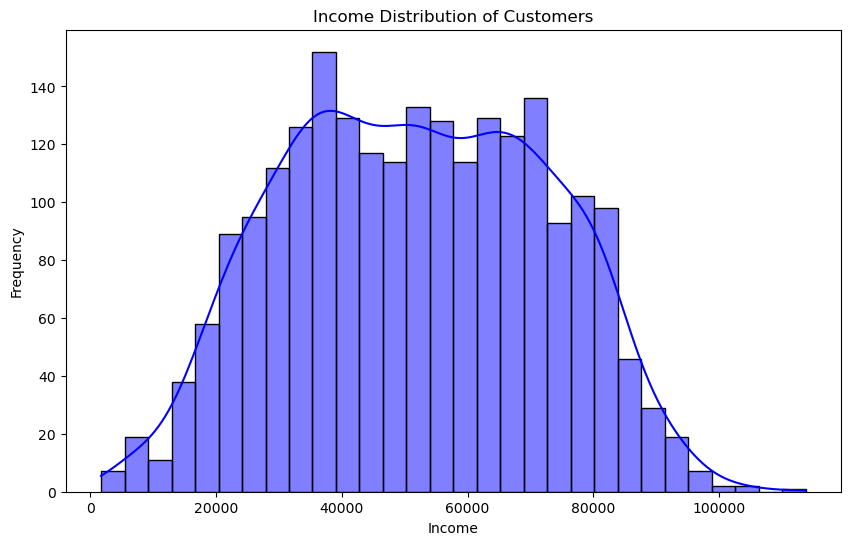

In [208]:

plt.figure(figsize=(10, 6))
sns.histplot(df_cleaned['Income'], bins=30, kde=True, color='blue')
plt.title('Income Distribution of Customers')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()


2. Income and Monetary

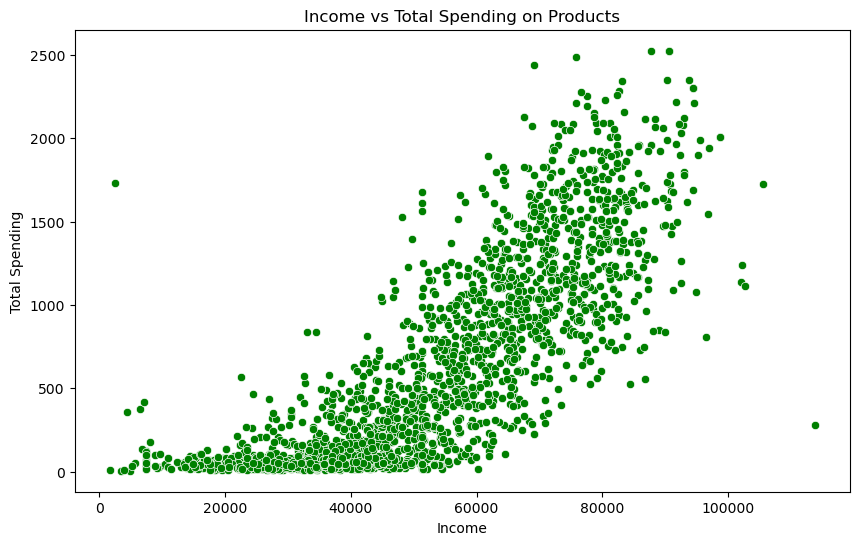

In [129]:
# Scatter plot untuk Income vs Monetary
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Income', y='Monetary', data=df_cleaned, color='green')
plt.title('Income vs Total Spending on Products')
plt.xlabel('Income')
plt.ylabel('Total Spending')
plt.show()


3. Average Spending Based on Income Category

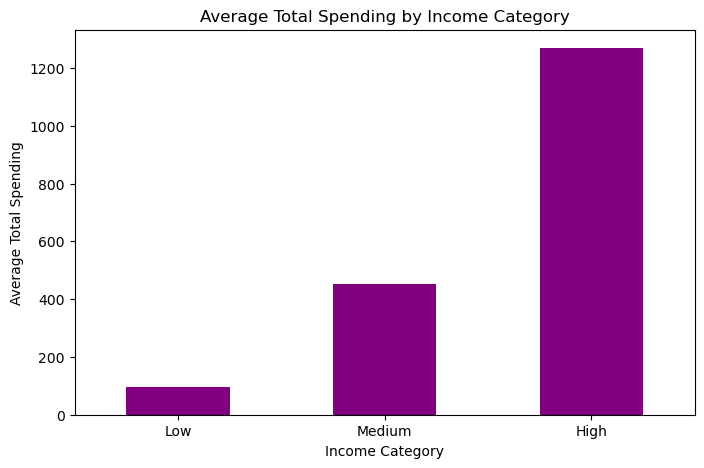

In [234]:
avg_spending_by_income = df_cleaned.groupby('Income_Group')['Monetary'].mean()


plt.figure(figsize=(8, 5))
avg_spending_by_income.plot(kind='bar', color='purple')
plt.title('Average Total Spending by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Average Total Spending')
plt.xticks(rotation=0)
plt.show()


# Campaign

1. Total Acceptence every Campaign

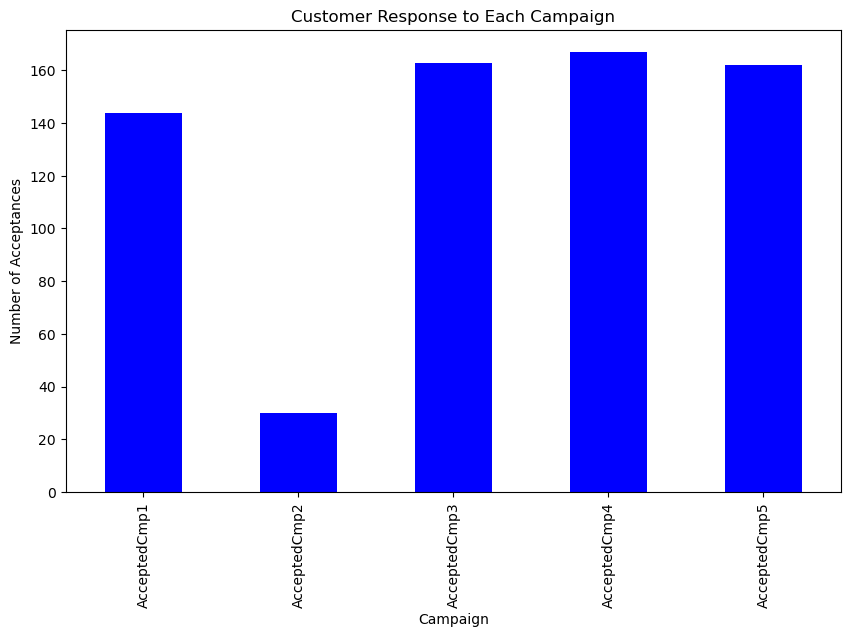

In [235]:

# Count total customer who accepted each campaign
campaign_columns = ['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']
campaign_counts = df_cleaned[campaign_columns].sum()


plt.figure(figsize=(10, 6))
campaign_counts.plot(kind='bar', color='blue')
plt.title('Customer Response to Each Campaign')
plt.xlabel('Campaign')
plt.ylabel('Number of Acceptances')
plt.show()


2. Average Campaign Acception by Marital Status 


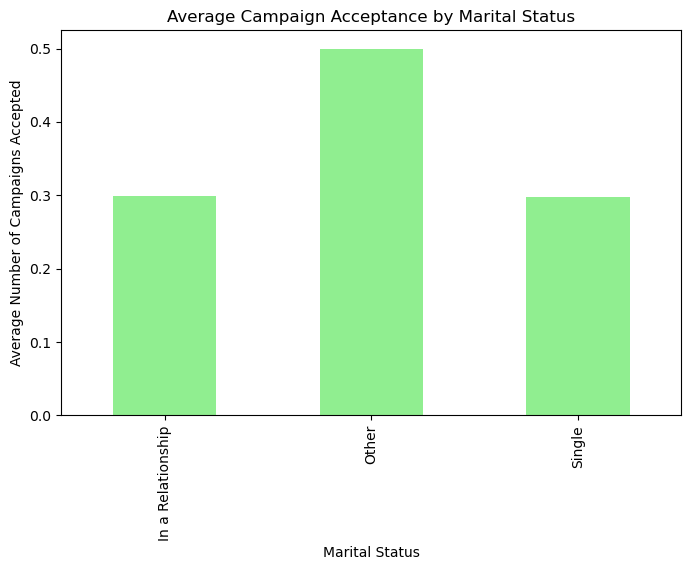

In [236]:
# Total accepted campaign
df_cleaned['Total_Accepted'] = df_cleaned[campaign_columns].sum(axis=1)
avg_acceptance_by_marital = df_cleaned.groupby('Marital_Status_Grouped')['Total_Accepted'].mean()


plt.figure(figsize=(8, 5))
avg_acceptance_by_marital.plot(kind='bar', color='lightgreen')
plt.title('Average Campaign Acceptance by Marital Status')
plt.xlabel('Marital Status')
plt.ylabel('Average Number of Campaigns Accepted')
plt.show()


3. Average Campaign Acception by Income Category


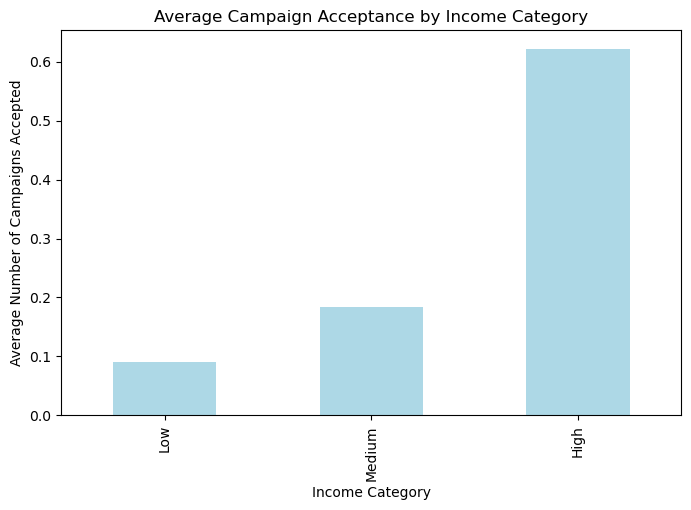

In [241]:
df_cleaned['Total_Accepted'] = df_cleaned[campaign_columns].sum(axis=1)
avg_acceptance_by_income = df_cleaned.groupby('Income_Group')['Total_Accepted'].mean()

# Visualisasi bar chart
plt.figure(figsize=(8, 5))
avg_acceptance_by_income.plot(kind='bar', color='lightblue')
plt.title('Average Campaign Acceptance by Income Category')
plt.xlabel('Income Category')
plt.ylabel('Average Number of Campaigns Accepted')
plt.show()


# Campaign and Platform Corelation


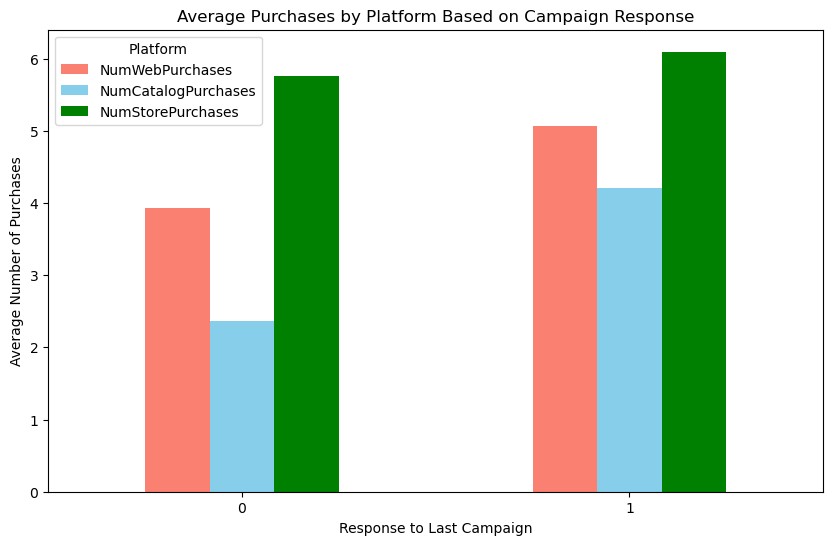

In [ ]:
# 1 is accepted last campaign, 0 is not participation in last campaign
# Average purchases per platform based on response to last campaign
avg_purchase_by_response = df_cleaned.groupby('Response')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()


avg_purchase_by_response.plot(kind='bar', figsize=(10, 6), color=['salmon', 'skyblue', 'green'])
plt.title('Average Purchases by Platform Based on Campaign Response')
plt.xlabel('Response to Last Campaign')
plt.ylabel('Average Number of Purchases')
plt.legend(title='Platform')
plt.xticks(rotation=0)
plt.show()


2. Analysis of Total Purchases Based on Campaigns Received

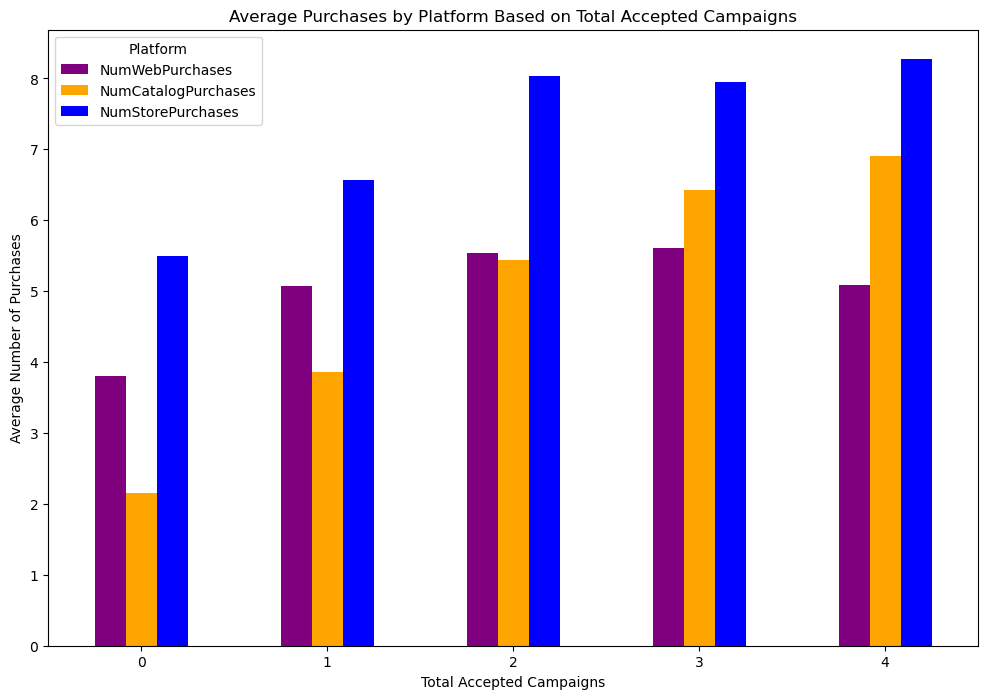

In [243]:

df_cleaned['Total_Accepted_Campaigns'] = df_cleaned[['AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5']].sum(axis=1)
avg_purchase_by_campaigns = df_cleaned.groupby('Total_Accepted_Campaigns')[['NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases']].mean()


avg_purchase_by_campaigns.plot(kind='bar', figsize=(12, 8), color=['purple', 'orange', 'blue'])
plt.title('Average Purchases by Platform Based on Total Accepted Campaigns')
plt.xlabel('Total Accepted Campaigns')
plt.ylabel('Average Number of Purchases')
plt.legend(title='Platform')
plt.xticks(rotation=0)
plt.show()


In [244]:
df_cleaned.to_csv('Supermarket_clean.csv', index=False)
